In [2]:
%pip install sentence-transformers umap-learn matplotlib
from sentence_transformers import SentenceTransformer
import umap
import matplotlib.pyplot as plt


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 488 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 25.3 MB/s eta 0:00:01
     |████████████████████████████████| 7.8 MB 17.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 8.1 MB/s eta 0:00:01
     |████████████████████████████████| 12.0 MB 95.4 MB/s eta 0:00:01
     |████████████████████████████████| 515 kB 102.0 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 34.3 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 80.1 MB/s eta 0:00:01
     |████████████████████████████████| 73.6 MB 23.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 22.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.3 MB 22.4 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 35.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.7 MB 23.7 MB/s eta 0:00:01
     |███████████████████

/Users/studiocat/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/studiocat/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.


In [10]:
# SAMPLE DATA

data = {
    "apple": "fruit",
    "banana": "fruit",
    "orange": "fruit",
    "cat": "animal",
    "dog": "animal",
    "hamster": "animal",
    "Harvard University": "school",
    "MIT": "school",
    "Stanford University": "school"
}


data = {
    "man": "man",
    "woman": "woman",
    "girl": "girl",
    "king": "king",
    "queen": "queen",
}

texts = list(data.keys())
labels = list(data.values())

/Users/studiocat/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/studiocat/Library/Python/3.9/lib/python/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


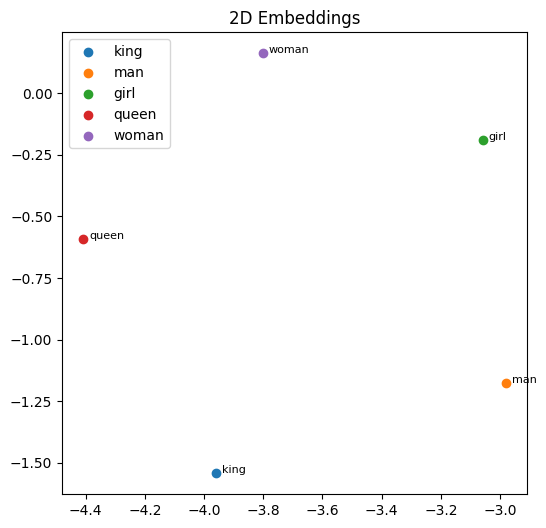

In [11]:
# EMBED TEXTS AND REDUCE DIMENSIONS
model = SentenceTransformer("all-MiniLM-L6-v2")
emb = model.encode(texts)
reducer = umap.UMAP(n_components=2, random_state=42)
emb2d = reducer.fit_transform(emb)

# PLOTTING

plt.figure(figsize=(6, 6))
unique_labels = set(labels)

for label in unique_labels:
    idx = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(emb2d[idx, 0], emb2d[idx, 1], label=label)

for i, txt in enumerate(texts):
    plt.text(emb2d[i, 0] + 0.02, emb2d[i, 1], txt, fontsize=8)

plt.legend()
plt.title("2D Embeddings")
plt.show()